In [1]:
%load_ext autoreload
%autoreload 2

In [624]:
from torch import nn 
import torch
import numpy as np
import pandas as pd
import vae_cyc as vc

In [3]:
max_seq_length = 10 
embed_size = 4 
vocab_size = 3 

In [4]:
emb = nn.Embedding(vocab_size, embed_size)

In [5]:
pe = nn.Parameter(
            torch.zeros(1, max_seq_length, embed_size)
        )

In [6]:
x = torch.randint(0, vocab_size, size=(1, 10))

In [7]:
pe.shape

torch.Size([1, 10, 4])

In [8]:
pe.shape

torch.Size([1, 10, 4])

In [1275]:
m = vc.Transformer.load_from_checkpoint('/workspace/transformer-zinc-100m/last-v1.ckpt')

In [1276]:
m = m.eval()

In [1277]:
vocab = vc.Vocab.load('zinc-vocab.json')

In [1279]:
dm.to_image(m.generate(argmax=True))

RuntimeError: The size of tensor a (129) must match the size of tensor b (128) at non-singleton dimension 1

In [ ]:
df = pd.read_csv('moses.csv')
df = df.sample(n=1000000)
df = df.reset_index()


In [ ]:
import datamol as dm
from genchem.rl.utils import tanimoto_similarity
outputs = []
sims = []
for i in range(10):
    print(i)
    idx = np.random.randint(0, 100000)
    smi = df.SMILES.values[idx]
    outputs.append(smi)
    o = m.generate(smiles=[smi], include_mask=False, argmax=True)
    o = m.vocab.decode_special(o)
    outputs.append(o)
    print(o)
    try:
        s = tanimoto_similarity(o, smi)
    except:
        s = 0
    print(s)
    sims.append(s)

In [1269]:
np.mean(sims)

0.17187467283555552

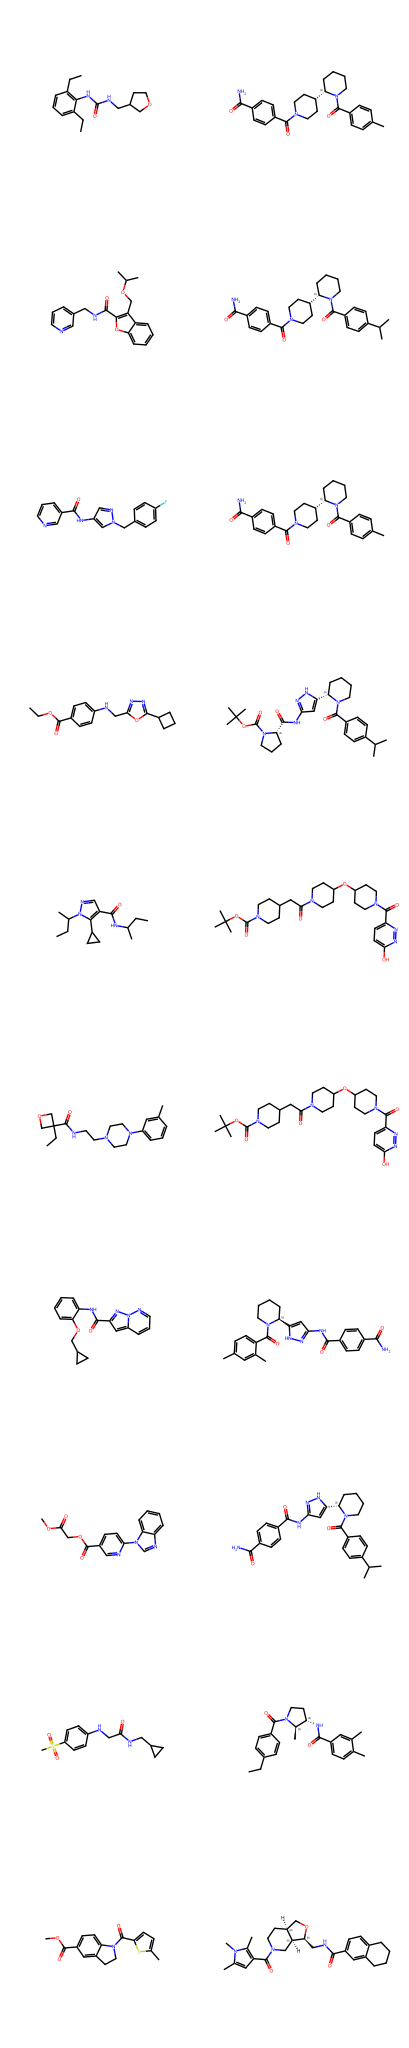

In [1270]:
dm.to_image(outputs, align=False, n_cols=2)

In [995]:
import numpy as np

# Define the shape and dtype of the array
shape = (10000, 100)  # Example: 10,000 rows, 100 columns
dtype = 'float32'

# Create a memory-mapped file
filename = "data.memmap"
data = np.memmap(filename, dtype=dtype, mode='w+', shape=shape)

# Populate the array
data[:] = np.random.rand(*shape)  # Fill with random values
data.flush()  # Ensure changes are written to disk

print("Memory-mapped file created:", filename)


Memory-mapped file created: data.memmap


In [996]:
# Open the memory-mapped file in read-only mode
data = np.memmap(filename, dtype=dtype, mode='r', shape=shape)

# Access a specific portion of the data
subset = data[:10, :5]  # First 10 rows and 5 columns
print("Subset of data:\n", subset)

Subset of data:
 [[0.5320123  0.60774815 0.60090417 0.9923009  0.8275508 ]
 [0.39548117 0.41775334 0.9911991  0.16831948 0.5599836 ]
 [0.6022065  0.15043473 0.04969675 0.5765545  0.847948  ]
 [0.41035286 0.6821075  0.10831995 0.19698781 0.09232754]
 [0.83075035 0.54174817 0.16109711 0.8353815  0.5537145 ]
 [0.80815756 0.586708   0.00715686 0.43406102 0.19833168]
 [0.27616334 0.51255155 0.056127   0.02109996 0.02525206]
 [0.28454855 0.6073506  0.99354887 0.87990135 0.80776024]
 [0.02406495 0.3209348  0.26140243 0.47225133 0.06668602]
 [0.24847704 0.174742   0.15180132 0.6807059  0.10692458]]
